# Book Recommendation System - Part 1

## Background

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

## Import Dataset

In [3]:
pd.options.display.float_format = '{:.2f}'.format
r = pd.read_csv('ratings.csv')
b = pd.read_csv('books_cleaned.csv')

In [4]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In **dataset r**, there are three columns, which are:
1. `user_id`: user identification number
2. `book_id`: book identification number
3. `rating`: rating given by `user_id`

In [5]:
r.shape

(5976479, 3)

In [6]:
for col in r.columns:
    print(f"Number of {col} is {r[col].nunique()}")

Number of user_id is 53424
Number of book_id is 10000
Number of rating is 5


There are 5,976,479 ratings given by 53,424 people on 10,000 books.

### 2. Books

Now let's explore our book metadata, we can first check the shape of the data.

In [7]:
b.shape

(10000, 11)

It has 10000 rows and 30 columns. We want to display values in all columns, therefore we will transpose the table and only show first three rows.

In [8]:
b.head(3).T

,0,1,2
Unnamed: 0,0,1,2
book_id,1,2,3
title,"The Hunger Games (The Hunger Games, #1)",Harry Potter and the Sorcerer's Stone (Harry P...,"Twilight (Twilight, #1)"
year,2008,1997,2005
pages,374,309,501
description,winning means fame and fortunelosing means cer...,harry potters life is miserable his parents ar...,about three things i was absolutely positive ...
genres,"youngadult, fiction, fantasy, sciencefiction, ...","fantasy, fiction, youngadult, classics","youngadult, fantasy, romance, fiction, paranormal"
average_rating,4.34,4.44,3.57
ratings_count,4780653,4602479,3866839
books_count,272,491,226


In [9]:
#divide the columns to numerical and categorical value
nums = b.select_dtypes(include=[np.number]).columns
cats = b.select_dtypes(exclude=[np.number]).columns

In [10]:
b[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
year,10000.00,1982.04,152.42,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,10000.00,359.25,216.17,0.00,251.00,336.00,422.00,5216.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
ratings_count,10000.00,54001.24,157369.96,2716.00,13568.75,21155.50,41053.50,4780653.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00


In [11]:
b[cats].describe().T

,count,unique,top,freq
title,10000,9964,Selected Poems,4
description,10000,9829,the first in a spectacularly genremashing adve...,4
genres,10000,4351,"fantasy, fiction",152
authors,10000,3835,James Patterson,96


- The most popular author is Stephen King
- Selected Poems appears 4 times. Is it the same book?

In [15]:
not_unique_nums = ['average_rating', 'books_count', 'original_publication_year', 'pages', 
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count', 
                    'work_ratings_count', 'work_text_reviews_count']

## Univariate Analysis

KeyError: 'original_publication_year'

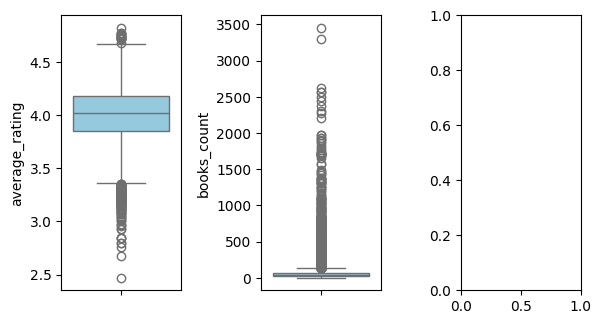

In [18]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = not_unique_nums
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=b[features[i]], color='skyblue')
    plt.tight_layout()

## Bivariate Analysis

Now, let's check the correlation between columns.

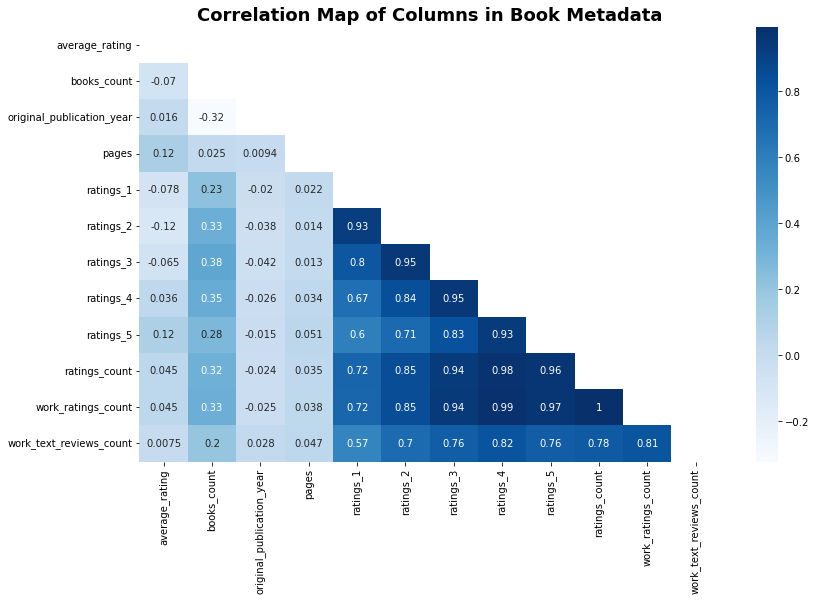

In [30]:
#build correlation table
corr = b[not_unique_nums].corr()

# create heatmap
upper_triangle = np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(corr, cmap="Blues", annot=True, mask=upper_triangle)
plt.title('Correlation Map of Columns in Book Metadata', weight='bold', fontsize=18)
plt.show()

In [19]:
#check missing value
dataset = [r, b]
for data in dataset:
    print(data.isnull().values.any())

False
False


In [20]:
#check duplicated rows
for data in dataset:
    print(data.duplicated().values.any())

False
False


There is no duplicate row in both dataset, but we have missing value in book metadata.

In [21]:
#make a copy 
books = b.copy()

In [22]:
percent_missing = books.isnull().sum() * 100 / len(books)
missing_value = (pd.DataFrame({'percent_missing': percent_missing})).sort_values(by=['percent_missing'], ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing


In [ ]:
#compare original_publication_year and publishdate when original_publication_year is null
books[books['original_publication_year'].isnull()][['original_publication_year', 'publishDate']]

Lucky that all rows that are invalid in `original_publication_year` has the year in `publishDate`. Therefore, we can get year in `publishDate` and impute it to `original_publication_year`.

In [ ]:
#get year from publishDate to original_publication_year
books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)
books['publishDate'] = books['publishDate'].str.extract('(\d{4})$').fillna('')
books['original_publication_year'] = books['original_publication_year'].fillna(books['publishDate'])
books['description'] = books['description'].fillna(books['title'])

In [37]:
#impute null in pages with median
books['pages'] = books['pages'].fillna(books['pages'].median())

In [38]:
#drop unnecessary columns with null
books = books.drop(['isbn', 'original_title', 'isbn13', 'publishDate'], axis=1)

In [39]:
#check missing value
books.isnull().values.any()

False

In [40]:
#keep important columns, drop the rest
cols_to_keep = ['book_id', 'title', 'authors', 'original_publication_year', 'pages', 'description', 'genres', 'average_rating', 'ratings_count', 'books_count']
books = books[cols_to_keep]

Now, let's check the value in each columns. In order to find any strange characters, we need to display column width to maximum. 

In [41]:
#display max column
with pd.option_context('display.max_colwidth', None):
    display(books.head(5))

,book_id,title,authors,original_publication_year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008.00,374.00,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997.00,309.00,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005.00,501.00,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,4,To Kill a Mockingbird,['Harper Lee'],1960.00,324.00,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American l

In our top 5 entry, we found unnecessary characters that are not supposed to be in `description` column. We need to delete that unnecessary characters in order to make better result in finding similar books. It is actually time consuming to check it one by one, but we tried our best to capture all unnecessary characters and try to guess the rest. And then we delete that unnecessary characters and make all fonts lowercase.

In [25]:
#delete unnecessary characters from authors, genres and description column
col_trans = ['authors', 'genres', 'description']
for col in col_trans:
    books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True) 
books['description'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
books['description'] = books['description'].str.lower()

In [26]:
#rename column and change year, pages, and book_count to integer
books.rename(columns = {'original_publication_year':'year'}, inplace = True)
books[['year', 'pages', 'books_count']] = books[['year', 'pages', 'books_count']].astype(int)

We try to check 10 samples. If they are looking good (there are no unnecessary characters anymore) then we are good to go!

In [27]:
with pd.option_context('display.max_colwidth', None):
    display(books.sample(10))

,Unnamed: 0,book_id,title,year,pages,description,genres,average_rating,ratings_count,books_count,authors
3413,3413,3698,The Real Mother Goose,1916,128,for nearly a century the real mother goose has delighted young children!for more than seventyfive years the real mother goose has been delighting millions of children and today the magic is as strong as ever heralded as the standard mother goose by parents grandparents teachers and librarians this wonderful book with blanche fisher wrights lively colorful pictures makes an enchanting introduction for the very youngmother goose rhymes are a vital part of childhood and this collection of essential rhymes have been reproduced exactly as they have been repeated from generation to generation,"poetry, classics, fiction, fantasy, youngadult",4.33,31643,56,Blanche Fisher Wright
6710,6710,7850,The Little Old Lady Who Was Not Afraid of Anything,1986,32,“a splendiferous halloween story” the horn book “a great purchase for halloween or any time of year” school library journal starred reviewonce upon a time there was a little old lady who was not afraid of anything! but one autumn night while walking in the woods the little old lady heardclomp clomp shake shake clap clapand the little old lady who was not afraid of anything had the scare of her life! with bouncy refrains and classic art this timeless halloween story is perfect for reading aloud,"fiction, fantasy, classics",4.25,14270,26,Linda Williams
8736,8736,5400,Don't Let the Pigeon Stay Up Late!,2006,130,ever since they were driven from their homelands by the adversary the nonhuman fables have been living on the farma vast property in upstate new york that keeps them hidden from the prying eyes of the mundane world but now after hundreds of years of isolation the farm is seething with revolution fanned by the inflammatory rhetoric of goldilocks and the three little pigs and when snow white and her sister rose red stumble upon their plan to liberate the homelands the commissars of the farm are ready to silence themby any means necessary!collecting the second story arc of creator and writer bill willinghams acclaimed series fables animal farm features the stunning artwork of penciller mark buckingham and inker steve leialoha and includes a special sketchbook section of preliminary artwork from willingham buckingham and cover artist james jeancollecting fables 610,"graphicnovels, comics, fantasy, fiction, mystery, crime, manga",4.35,25532,16,Bill Willingham
2510,2510,2689,The Napping House,1984,16,everyone knows the cumulative rhyme “this is the house that jack built” but the napping house 1984 is close on its heels in the race for posterity “and on that granny there is a child a dreaming child on a snoring granny on a cozy bed in a napping house where everyone is sleeping” included in the napping house menagerie is a dozing dog a snoozing cat a slumbering mouse and a wakeful flea who ends up toppling the whole sleep heap with one chomp! don wood’s delightfully detailed comical illustrations are bathed in moonlight blues until the sun comes up then all is color and rainbows and a very awake household awards ala notable children’s book new york times book review best illustrated book of the year golden kite award winner california young reader medal winner booklist editors’ choice,"fiction, classics",4.27,37773,36,Audrey Wood
121,121,135,"A Storm of Swords (A Song of Ice and Fire, #3)",2000,1177,an alternate cover for this can be found herehere is the third volume in george rr martins magnificent cycle of novels that includes a game of thrones and a clash of kings together this series comprises a genuine masterpiece of modern fantasy destined to stand as one of the great achievements of imaginative fictionof the five contenders for power one is dead another in disfavor and still the wars rage as alliances are made and broken joffrey sits on the iron throne the uneasy ruler of the seven kingdoms his most bitter rival lord stannis stands defe

# EDA Questions

### 1. How is the rating for all books distributed?

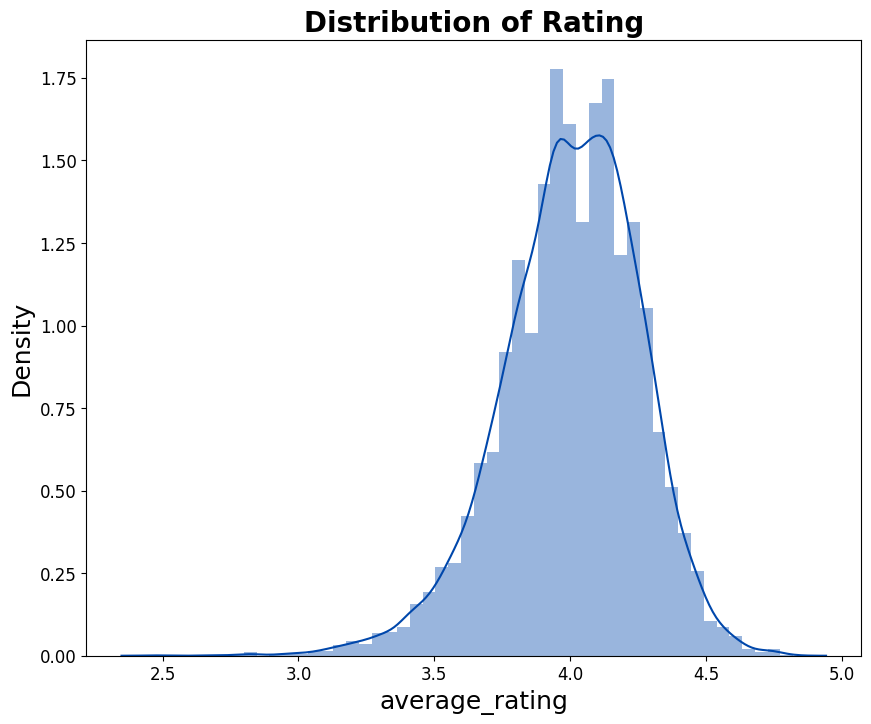

In [28]:
#Rating distribution based on books metadata
plt.figure(figsize=(10,8))
sns.distplot(books['average_rating'], color = '#0047AB')
plt.title('Distribution of Rating', weight='bold', fontsize =20)
plt.xlabel('average_rating', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
books.describe()

,Unnamed: 0,book_id,year,pages,average_rating,ratings_count,books_count
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4999.50,5000.50,1982.04,359.25,4.00,54001.24,75.71
std,2886.90,2886.90,152.42,216.17,0.25,157369.96,170.47
min,0.00,1.00,-1750.00,0.00,2.47,2716.00,1.00
25%,2499.75,2500.75,1990.00,251.00,3.85,13568.75,23.00
50%,4999.50,5000.50,2004.00,336.00,4.02,21155.50,40.00
75%,7499.25,7500.25,2011.00,422.00,4.18,41053.50,67.00
max,9999.00,10000.00,2017.00,5216.00,4.82,4780653.00,3455.00


Since this is a list of 10,000 popular books, we admit the fact that the majority of the books are good books with an average value of 4. 

### 2. How is the average rating per user distributed?

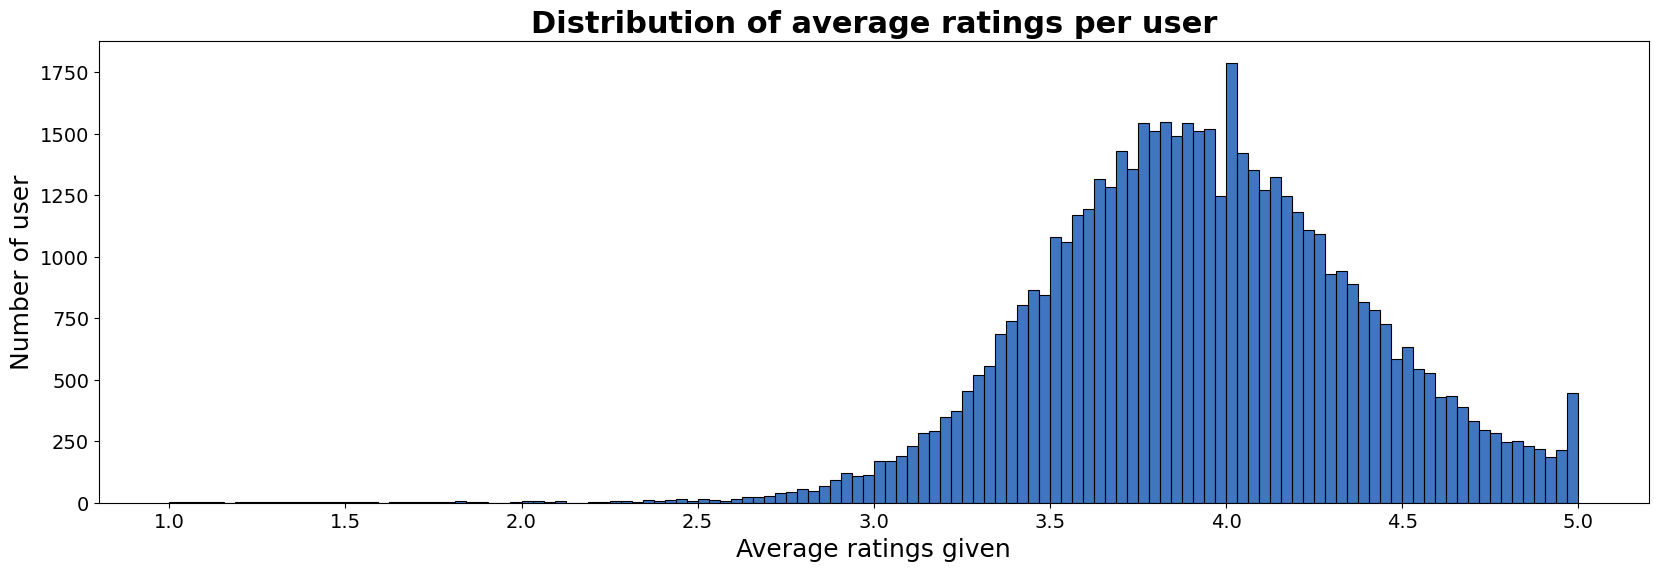

In [30]:
#Rating distribution based on rating dataset

# average rating per user
av_rating_user = r.groupby('user_id')['rating'].mean().reset_index()

#jumlah rating per buku
plt.figure(figsize=(20,6))
sns.histplot(data=av_rating_user, x='rating', color='#0047AB')
plt.title('Distribution of average ratings per user', weight='bold', fontsize=22)
plt.xlabel('Average ratings given', fontsize=18)
plt.ylabel('Number of user', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

There are few low ratings, and the peak seems to be at 4.

### 3. How many ratings does a book usually get?

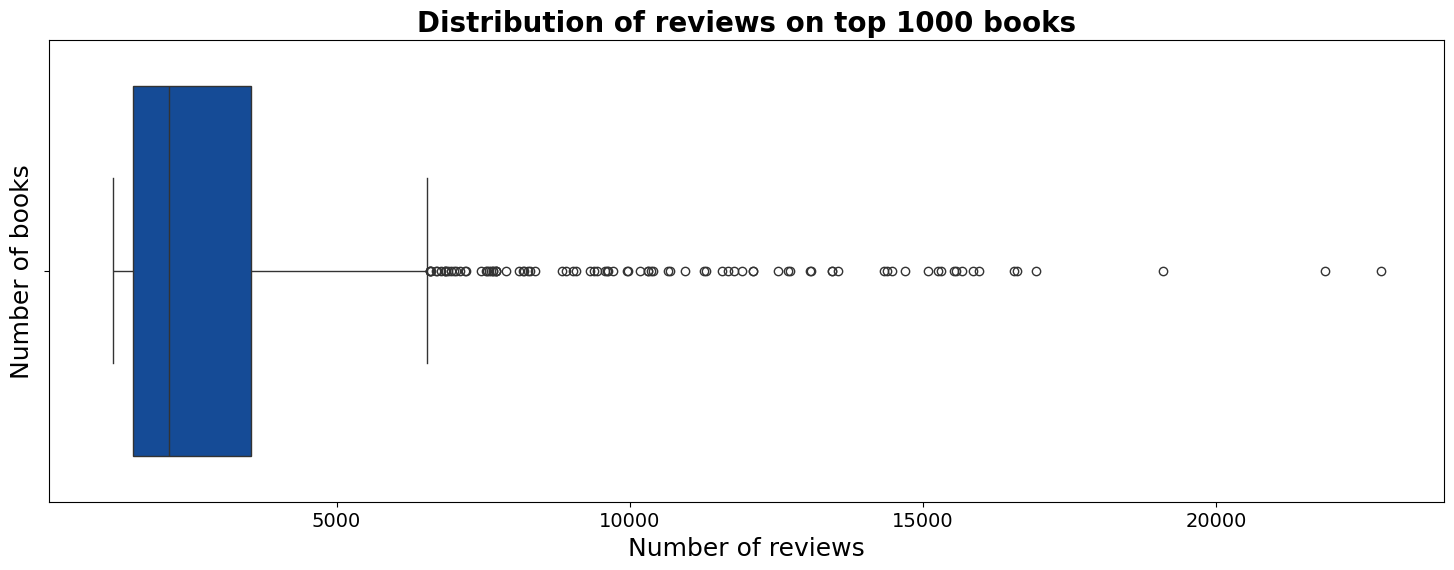

In [31]:
# ratings per book
ratings_per_book = (r.groupby('book_id')['rating'].count().reset_index()).sort_values(by='rating', ascending=False)

#visualize
plt.figure(figsize=(18,6))
sns.boxplot(data=ratings_per_book.head(1000), x='rating', color = '#0047AB')
plt.title('Distribution of reviews on top 1000 books', weight='bold', fontsize=20)
plt.xlabel('Number of reviews', fontsize=18)
plt.ylabel('Number of books', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

The distribution of reviews on books is positively skewed. There are more books that has less ratings. Let's check the number of rating distribution.

In [32]:
ratings_per_book['rating'].describe()

count   10000.00
mean      597.65
std      1267.29
min         8.00
25%       155.00
50%       248.00
75%       503.00
max     22806.00
Name: rating, dtype: float64

Books in this database have at least 8 reviews, while popular books have 22,806 reviews. The gap is too large. Now, let's check the outliers.

In [33]:
q3, q1 = np.percentile(ratings_per_book, [75 ,25])
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)
outlier_books = len(ratings_per_book[ratings_per_book['rating'] > maximum])
print(f'We have {outlier_books} books that are considered outlier, because they have more than {int(maximum)} number of ratings')

We have 26 books that are considered outlier, because they have more than 12515 number of ratings


### 4. How many ratings does a user usually give?

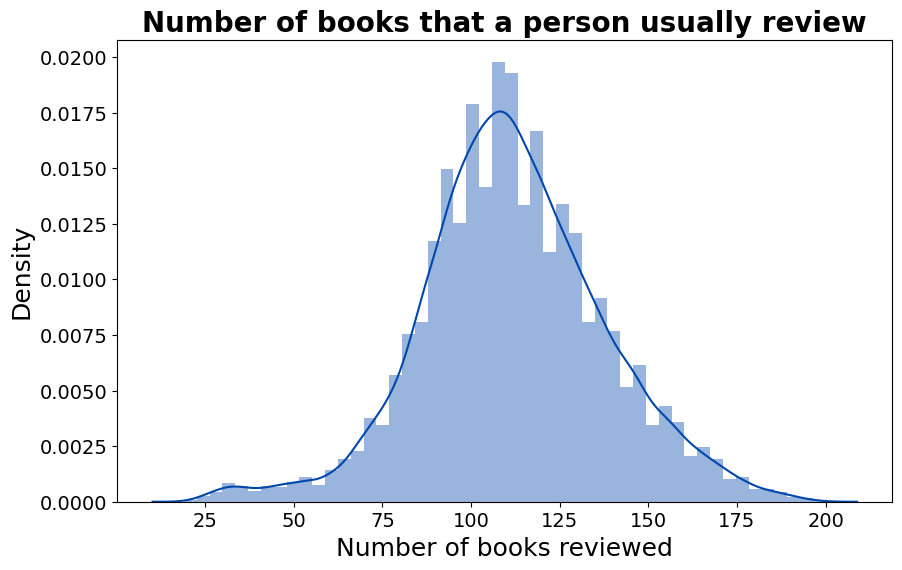

In [34]:
#agregate ratings by user
book_per_user = r.groupby('user_id')['rating'].count().reset_index()

#visualize
plt.figure(figsize=(10,6))
sns.distplot(book_per_user['rating'], color='#0047AB')
plt.title('Number of books that a person usually review', weight='bold', fontsize=20)
plt.xlabel('Number of books reviewed', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [35]:
book_per_user['rating'].describe()

count   53424.00
mean      111.87
std        26.07
min        19.00
25%        96.00
50%       111.00
75%       128.00
max       200.00
Name: rating, dtype: float64

In [36]:
book_per_user[book_per_user['rating'] == book_per_user['rating'].max()]['user_id'].values

array([12874, 30944], dtype=int64)

We will check the book recommended for one of this user later.

### 5. Does the ratings count affect average rating?

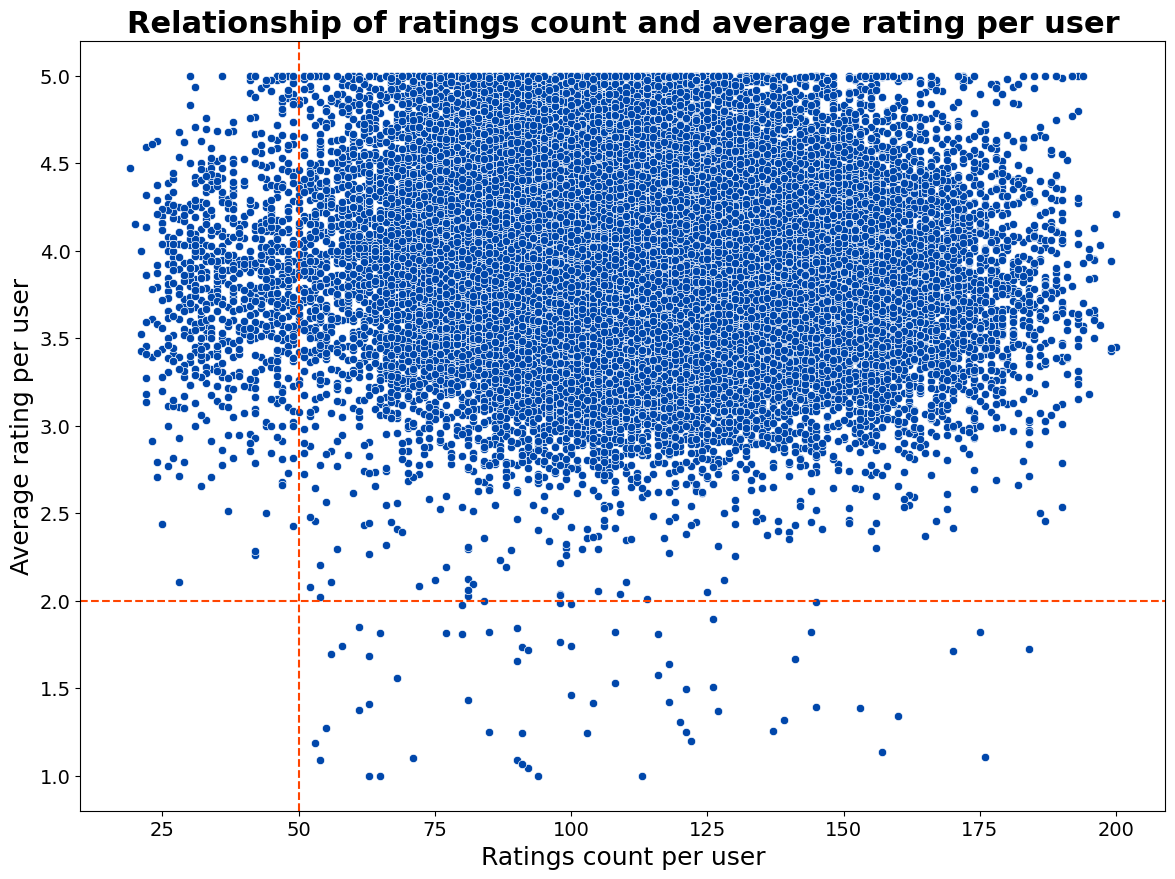

In [37]:
# merge average rating and number of ratings for each sampeld individual
id_merged = av_rating_user.merge(book_per_user, left_on="user_id", right_on="user_id")

#visualize
plt.figure(figsize=(14,10))
sns.scatterplot(x=id_merged['rating_y'], y=id_merged['rating_x'], color='#0047AB')
plt.title('Relationship of ratings count and average rating per user', weight='bold', fontsize=22)
plt.xlabel('Ratings count per user', fontsize=18)
plt.ylabel('Average rating per user', fontsize=18)
plt.axhline(y = 2, color = 'orangered', linestyle = '--')
plt.axvline(x = 50, color = 'orangered', linestyle = '--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- People who rate < 50 books tend to give higher ratings. 
- People start to give lower rating if they read more books. 
- This could be a result of an inappropriate book recommendation system, so that people end up reading books they don't like.

### 6. Which book has the highest rating and which book has the most ratings?

In [38]:
#Books with highest ratings
book_sorted_ratings = books.sort_values('average_rating', ascending=False)
book_sorted_ratings.head(10)

,Unnamed: 0,book_id,title,year,pages,description,genres,average_rating,ratings_count,books_count,authors
3353,3353,3628,The Complete Calvin and Hobbes,2005,1456,box set book one book two book three c...,"comics, graphicnovels, fiction, classics",4.82,28900,14,Bill Watterson
3043,3043,3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",2003,2690,box set containing harry potter and the sorcer...,"fantasy, youngadult, fiction, classics",4.77,33220,11,J.K. Rowling
810,810,862,"Words of Radiance (The Stormlight Archive, #2)",2014,1087,words of radiance book two of the stormlight a...,"fantasy, fiction",4.77,73572,34,Brandon Sanderson
6779,6779,7947,ESV Study Bible,2002,2750,the esv study bible was designed to help you u...,"christian, nonfiction, religion, classics, his...",4.76,8953,96,Anonymous
7403,7403,8854,Mark of the Lion Trilogy,1993,1468,this bestselling trilogy chronicles a tale of ...,"christian, historicalfiction, fiction, romance...",4.76,9081,6,Francine Rivers
4068,4068,4483,It's a Magical World: A Calvin and Hobbes Coll...,1996,176,when cartoonist bill watterson announced that ...,"comics, graphicnovels, fiction",4.75,22351,21,Bill Watterson
387,387,422,"Harry Potter Boxset (Harry Potter, #1-7)",1998,4100,over 4000 pages of harry potter and his world ...,"fantasy, youngadult, fiction, classics",4.74,190050,76,J.K. Rowling
5593,5593,6361,There's Treasure Everywhere: A Calvin and Hobb...,1996,176,in the world that calvin and his stuffed tiger...,"comics, fiction, graphicnovels",4.74,16766,22,Bill Watterson
5767,5767,6590,The Authoritative Calvin and Hobbes: A Calvin ...,1990,254,a collection of calvin and hobbes cartoons the...,"comics, graphicnovels, fiction, classics",4.73,16087,21,Bill Watterson
3457,3457,3753,"Harry Potter Collection (Harry Potter, #1-6)",2005,3342,six years of magic adventure and mystery make ...,"fantasy, fiction, youngadult, classics",4.73,24618,6,J.K. Rowling


In [39]:
#(Books with most reviews)
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count.head(10)

,Unnamed: 0,book_id,title,year,pages,description,genres,average_rating,ratings_count,books_count,authors
0,0,1,"The Hunger Games (The Hunger Games, #1)",2008,374,winning means fame and fortunelosing means cer...,"youngadult, fiction, fantasy, sciencefiction, ...",4.34,4780653,272,Suzanne Collins
1,1,2,Harry Potter and the Sorcerer's Stone (Harry P...,1997,309,harry potters life is miserable his parents ar...,"fantasy, fiction, youngadult, classics",4.44,4602479,491,J.K. Rowling
2,2,3,"Twilight (Twilight, #1)",2005,501,about three things i was absolutely positive ...,"youngadult, fantasy, romance, fiction, paranormal",3.57,3866839,226,Stephenie Meyer
3,3,4,To Kill a Mockingbird,1960,324,the unforgettable novel of a childhood in a sl...,"classics, fiction, historicalfiction, youngadult",4.25,3198671,487,Harper Lee
4,4,5,The Great Gatsby,1925,200,alternate cover edition the great gatsby f ...,"classics, fiction, historicalfiction, romance",3.89,2683664,1356,F. Scott Fitzgerald
5,5,6,The Fault in Our Stars,2012,313,despite the tumorshrinking medical miracle tha...,"youngadult, romance, fiction, contemporary",4.26,2346404,226,John Green
6,6,7,The Hobbit,1937,366,in a hole in the ground there lived a hobbit n...,"fantasy, classics, fiction, youngadult",4.25,2071616,969,J.R.R. Tolkien
7,7,8,The Catcher in the Rye,1951,277,the heronarrator of the catcher in the rye is ...,"classics, fiction, youngadult",3.79,2044241,360,J.D. Salinger
9,9,10,Pride and Prejudice,1813,279,alternate cover edition of since its immediat...,"classics, fiction, romance, historicalfiction",4.24,2035490,3455,Jane Austen
8,8,9,"Angels & Demons (Robert Langdon, #1)",2000,736,worldrenowned harvard symbologist robert langd...,"fiction, mystery, thriller, suspense, crime, h...",3.85,2001311,311,Dan Brown


In [ ]:
x= books['ratings_count']
y = books['average_rating']

j = sns.jointplot(x, y, 
                  height=10, 
                  kind='reg',
                  color='#0047AB',
                  line_kws={'color':'orangered'})

r, p = stats.pearsonr(x, y)

phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:.3f}, p={:.3f}'.format(r,p)], fontsize=12)

j.fig.suptitle('Comparison of ratings count and average rating per book', weight='bold', fontsize=18)
j.set_axis_labels('ratings_count', 'average_rating', fontsize=14)

# labels appear outside of plot area, so auto-adjust
j.figure.tight_layout() 

plt.show()

### 8. Who is the author with most books?

In [42]:
#First try with the simple count
author_book_count = books.groupby('authors')['title'].count().sort_values(ascending = False)
author_book_count.head()

authors
James Patterson    96
Stephen King       80
Nora Roberts       63
Dean Koontz        51
Terry Pratchett    48
Name: title, dtype: int64

Based in simple count, author with most books is Stephen King. However, in fact there are books written by more than one author, right?. So let's check them.

In [43]:
#take 'Stephen King' as an example
auth = []
books.authors.apply(lambda x: auth.append(x) if 'Stephen King' in x else [])
auth[:5]

['Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King']

Actually, there are several books written by more than one authors. These books are not included in the total books written by the author! I decided to pick only the first author to simplify our process.

In [44]:
prev_count = books.authors.value_counts()['Stephen King']
print(f'Number of books written by Stephen King was {len(auth)} not {prev_count}.')

Number of books written by Stephen King was 80 not 80.


In [45]:
#split authors in each books
a = []
books.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:5]

[]

In [46]:
#insert splitted author list in every row
authors_list = books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0        Suzanne Collins
1           J.K. Rowling
2        Stephenie Meyer
3             Harper Lee
4    F. Scott Fitzgerald
Name: authors, dtype: object

In [47]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0        Suzanne Collins
1           J.K. Rowling
2        Stephenie Meyer
3             Harper Lee
4    F. Scott Fitzgerald
Name: authors, dtype: object

In [48]:
#remove previous author column and join the new splitted authors
books = books.drop('authors', axis=1).join(splitted_authors)

In [49]:
# Take the first author for each book and remove the rest
books = books.drop_duplicates(subset='book_id', keep='first')

In [50]:
#author with most books
book_count_real = books['authors'].value_counts()
book_count_real.head()

authors
James Patterson    96
Stephen King       80
Nora Roberts       63
Dean Koontz        51
Terry Pratchett    48
Name: count, dtype: int64

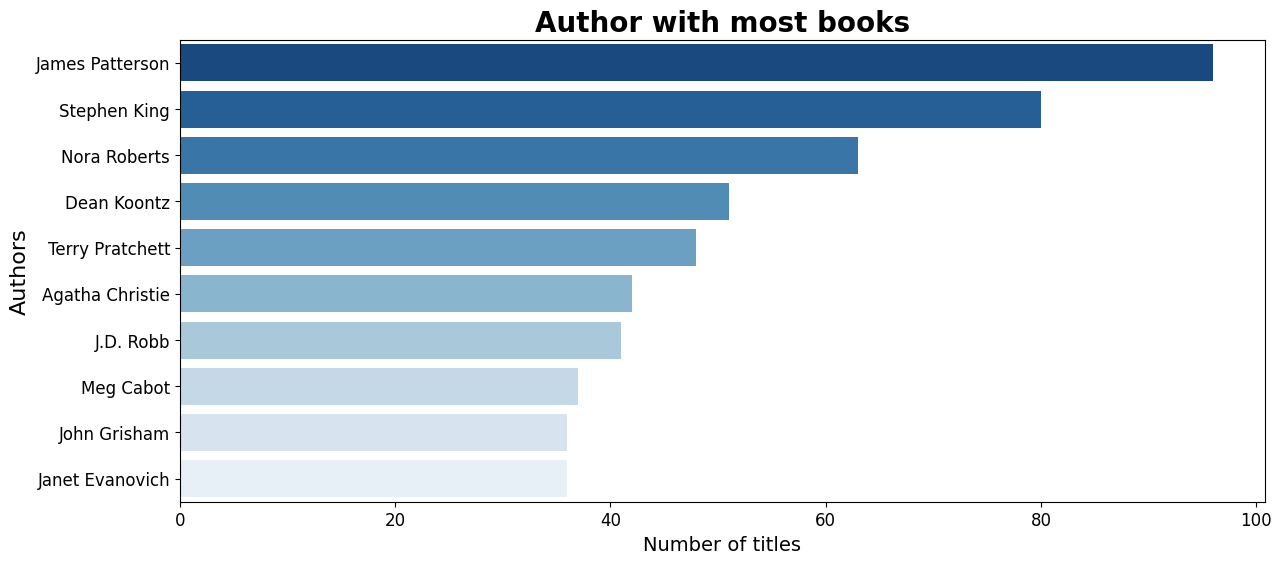

In [51]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=book_count_real.head(10).values, 
            y=book_count_real.head(10).index,
           palette = 'Blues_r')
plt.title('Author with most books', weight='bold', fontsize=20)
plt.xlabel('Number of titles', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### 9. Who is the most popular author?

In [52]:
# Let's check authors with most ratings_count
popular_author = books.groupby('authors')['ratings_count'].sum().sort_values(ascending = False)
popular_author.head(5)

authors
J.K. Rowling       16036005
Suzanne Collins     8646393
Stephenie Meyer     8512437
Stephen King        8250167
J.R.R. Tolkien      5454844
Name: ratings_count, dtype: int64

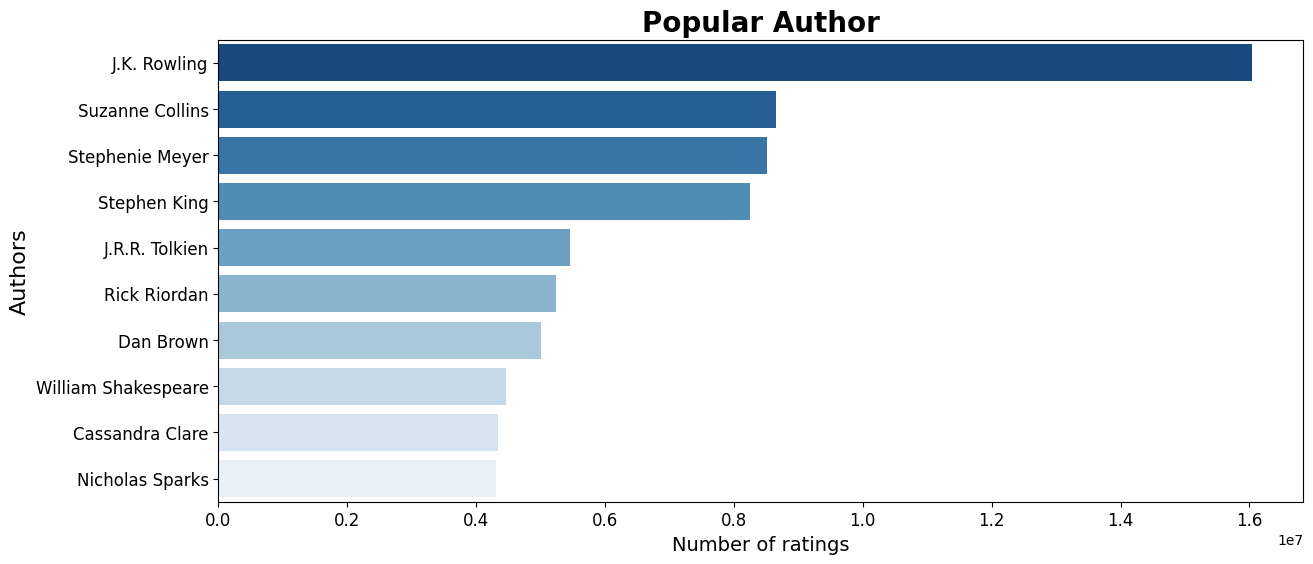

In [53]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=popular_author.head(10).values, 
            y=popular_author.head(10).index,
           palette = 'Blues_r')
plt.title('Popular Author', weight='bold', fontsize=20)
plt.xlabel('Number of ratings', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Even though James Patterson is the author with the most books, he is not the one who has the most ratings. We have J.K Rowling as the most ratings author with her 20 books in this dataset.

### 10. Who is the author that has good ratings book?

In [54]:
# Let's check authors with biggest number of rates (total number for all books)
high_rating_author = books.groupby('authors')['average_rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)

authors
Bill Watterson     4.70
Hafez              4.63
James E. Talmage   4.63
Eiichiro Oda       4.63
Angie Thomas       4.62
Name: average_rating, dtype: float64

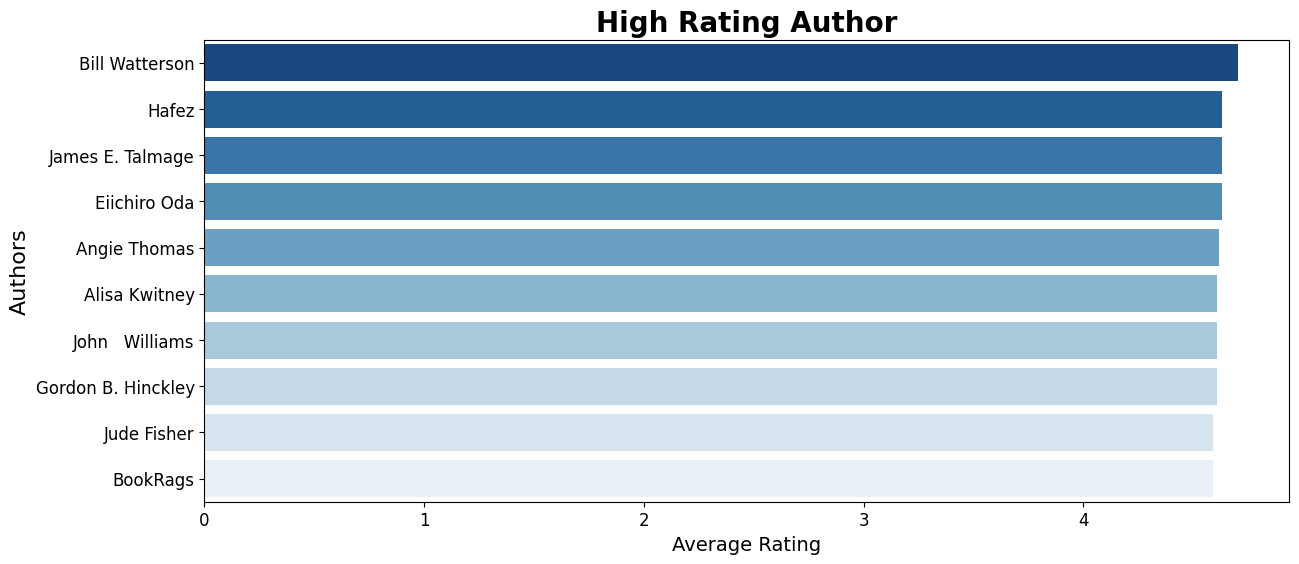

In [55]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=high_rating_author.head(10).values, 
            y=high_rating_author.head(10).index,
           palette = 'Blues_r')
plt.title('High Rating Author', weight='bold', fontsize=20)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Bill Watterson is the one with the highest rating. But as we can see, there isn't much of a difference between the authors average rating.

### 11. How is the relationship between the number of pages and the year the book was published?

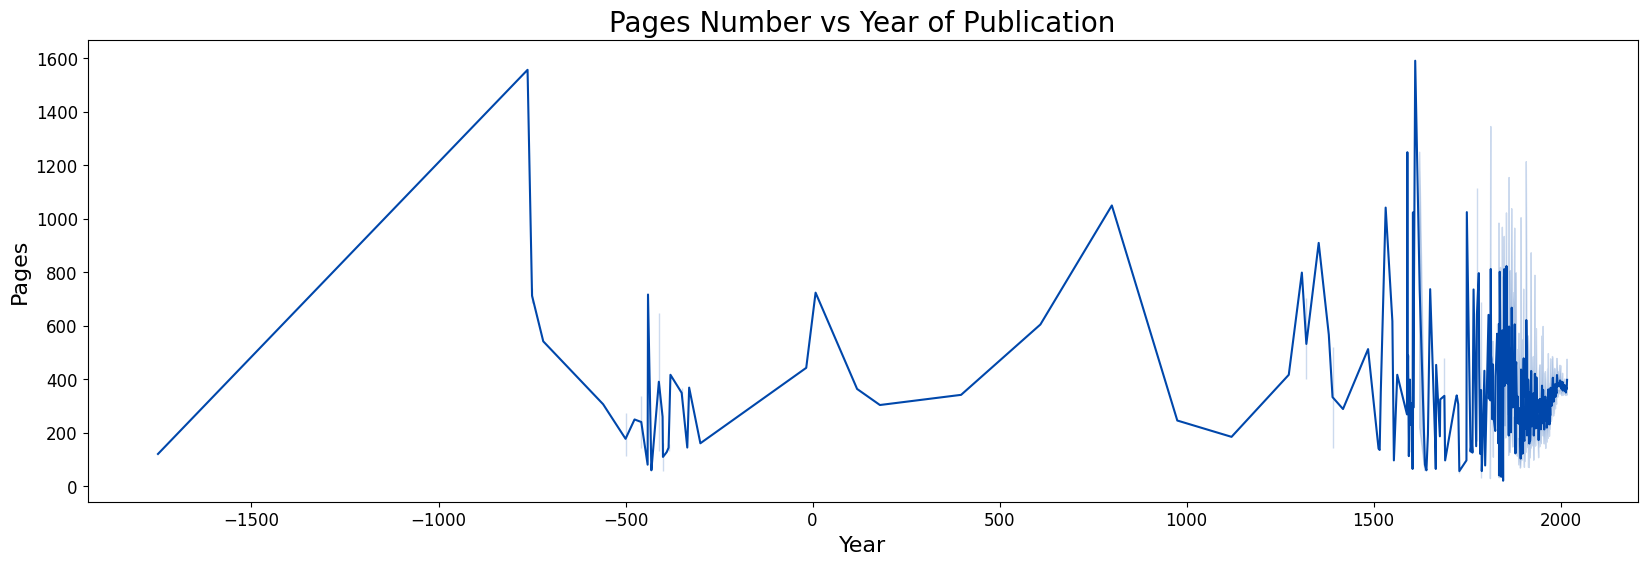

In [56]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'year', y = 'pages', data = books, color='#0047AB')
plt.title('Pages Number vs Year of Publication', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The range of year of publication is too large, therefore we need to check when the entry is more dense.

In [57]:
# Check the trend for books published after 1800
books_after_1800 = books[books['year'] > 1800]

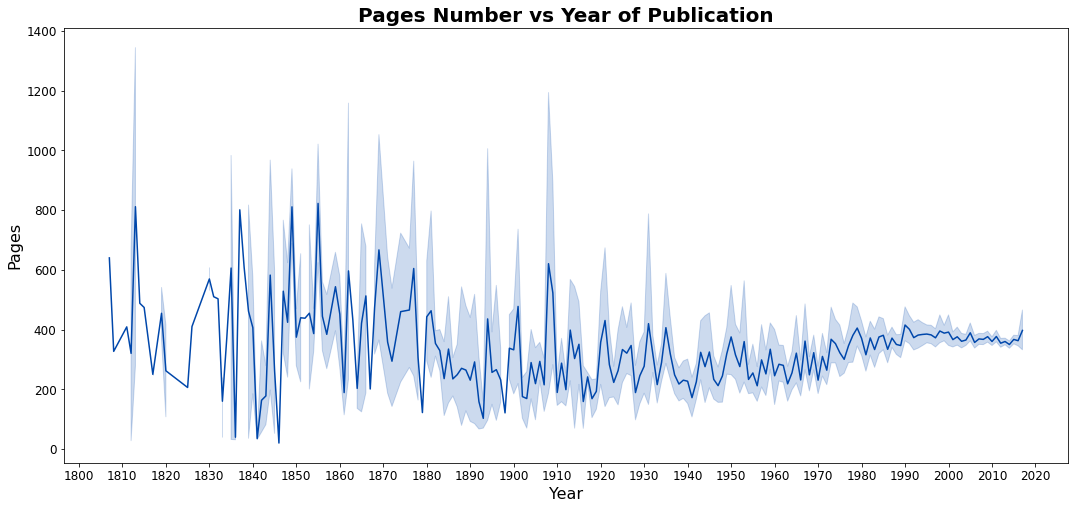

In [74]:
plt.figure(figsize = (18,8))
sns.lineplot(x = 'year', y = 'pages', data = books_after_1800, color='#0047AB')
plt.title('Pages Number vs Year of Publication', weight='bold', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(np.arange(1800, 2021, 10), fontsize=12)
plt.yticks(np.arange(0, 1401, 200), fontsize=12)
plt.show()

- Before 1900, the number of pages was randomly distributed. There are books that have more than 1000 pages but also books that have less than 100 pages. We can see that after 1900 the distribution started to stable, but it is less than 500 pages. 
- After 1980, the trend also show slight increase. Most of recent books have around 400 pages.

### 12. What genre dominates the dataset?

In [58]:
#split authors in each books
g = []
books.genres.apply(lambda x: g.append(x) if ',' in x else [])
g[:5]

['youngadult, fiction, fantasy, sciencefiction, romance',
 'fantasy, fiction, youngadult, classics',
 'youngadult, fantasy, romance, fiction, paranormal',
 'classics, fiction, historicalfiction, youngadult',
 'classics, fiction, historicalfiction, romance']

In [59]:
#insert splitted author list in every row
genres_list = books['genres'].apply(lambda x: [g for g in x.split(', ')] if ',' in x else x)
genres_list.head()

0    [youngadult, fiction, fantasy, sciencefiction,...
1             [fantasy, fiction, youngadult, classics]
2    [youngadult, fantasy, romance, fiction, parano...
3    [classics, fiction, historicalfiction, youngad...
4      [classics, fiction, historicalfiction, romance]
Name: genres, dtype: object

In [60]:
splitted_genres = genres_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_genres.name = 'genres'
splitted_genres.head()

0        youngadult
0           fiction
0           fantasy
0    sciencefiction
0           romance
Name: genres, dtype: object

In [61]:
#remove previous author column and join the new splitted authors
book_genres = books.drop('genres', axis=1).join(splitted_genres)

In [62]:
x = book_genres['genres']
y = book_genres['average_rating']

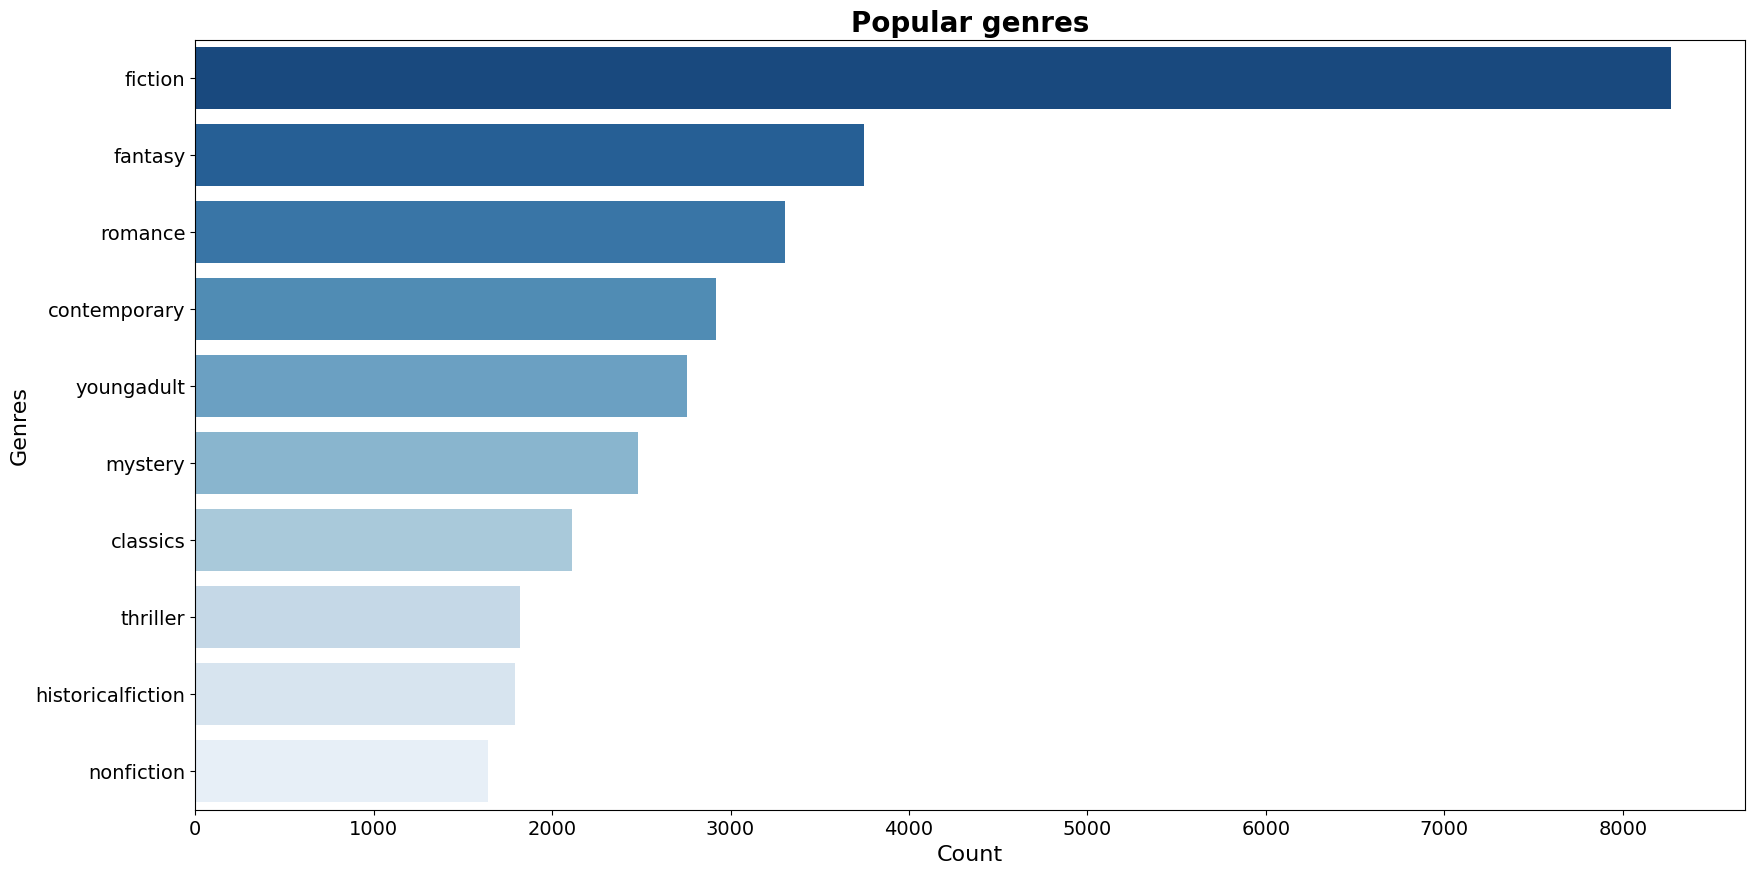

In [63]:
#rank the genre based on number of books
genres_rank = book_genres.genres.value_counts()

#visualize
plt.figure(figsize=(20,10))
sns.barplot(x=genres_rank.head(10).values,
            y=genres_rank.head(10).index,
            palette = 'Blues_r')
plt.title('Popular genres', weight='bold', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [64]:
books.to_csv('books_cleaned.csv')